### Task # 3 - To Explore Unsupervised Machine Learning
#### Given Problem Statement - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris_df = pd.read_csv('C:/Users/rajra/Downloads/The_Sparks Foundation/Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df = iris_df.drop('Id', axis = 1)

In [4]:
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

##### The given dataset contains the data of three different species of Iris(Flowering Plants) native to North America. This dataset was outlined by Ronald Fisher in his 1936 paper 'The use of multiple measurements in taxonomic problem' as an example of linear discriminant analysis. 


In [5]:
iris_df2 = iris_df.loc[:, 'SepalLengthCm':'PetalWidthCm']

In [6]:
iris_df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


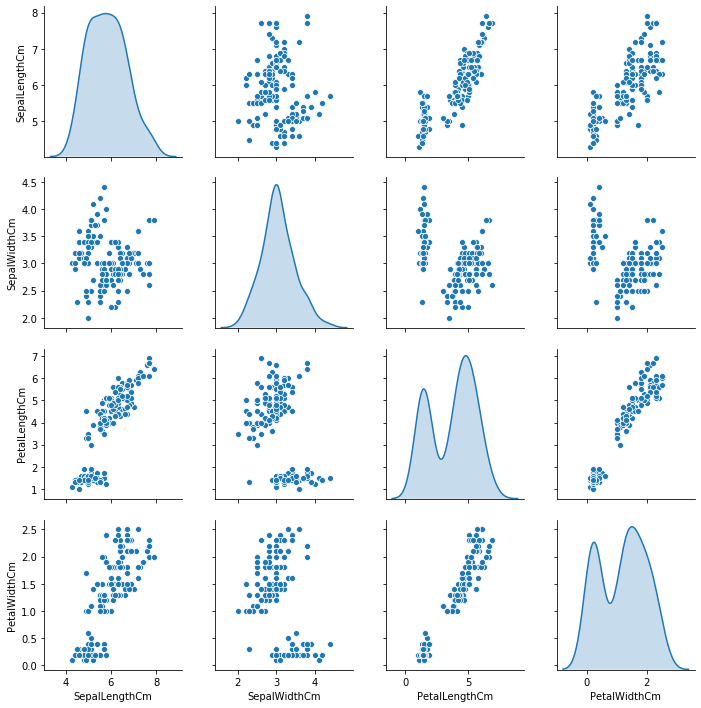

In [7]:
sns.pairplot(iris_df2, diag_kind = 'kde')

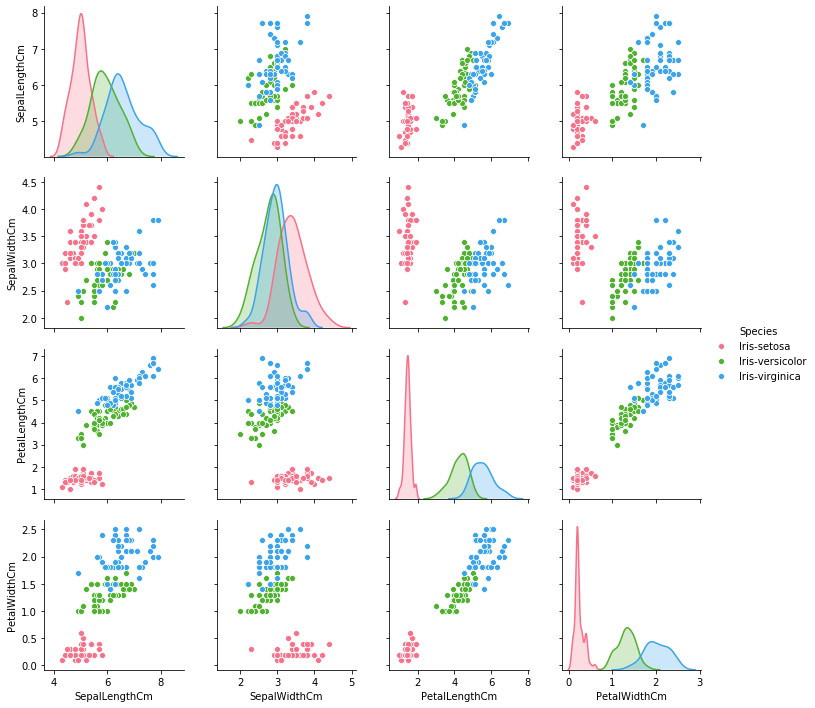

In [8]:
sns.pairplot(iris_df, vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
             hue='Species', palette='husl')
plt.show()

In [9]:
I_seto = iris_df[iris_df['Species'] == 'Iris-setosa']
I_seto.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [10]:
I_vc = iris_df[iris_df['Species'] == 'Iris-versicolor']
I_vc.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [11]:
I_vg = iris_df[iris_df['Species'] == 'Iris-virginica']
I_vg.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


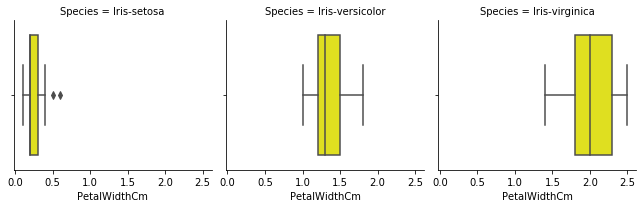

In [12]:
a = sns.FacetGrid(iris_df, col = 'Species')
a.map(sns.boxplot, 'PetalWidthCm', color = 'yellow')

In [13]:
from scipy.stats import zscore

df_scaled = iris_df2.apply(zscore)

In [14]:
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### KMeans Clustering

In [15]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 15, random_state = 2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.429708
4,5,91.191970
5,6,80.204334
6,7,72.409561
7,8,63.795006
8,9,54.812011
9,10,47.608553


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

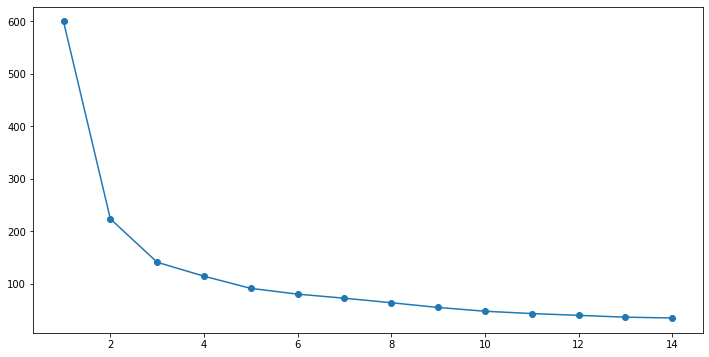

In [16]:
# Elbow plot

plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [17]:
kmeans = KMeans(n_clusters = 3, n_init = 15, random_state = 2)

In [18]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [19]:
centroids = kmeans.cluster_centers_

In [20]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled))

In [21]:
df_scaled['class'] = kmeans.labels_

In [22]:
c0 = centroids[0,:]
c0

array([1.13597027, 0.09659843, 0.996271  , 1.01717187])

In [23]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_, columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [24]:
df_scaled = df_scaled.drop('class', axis = 1)

In [25]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [26]:
iris_df_labeled['labels'].value_counts()

2    53
1    50
0    47
Name: labels, dtype: int64

In [27]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

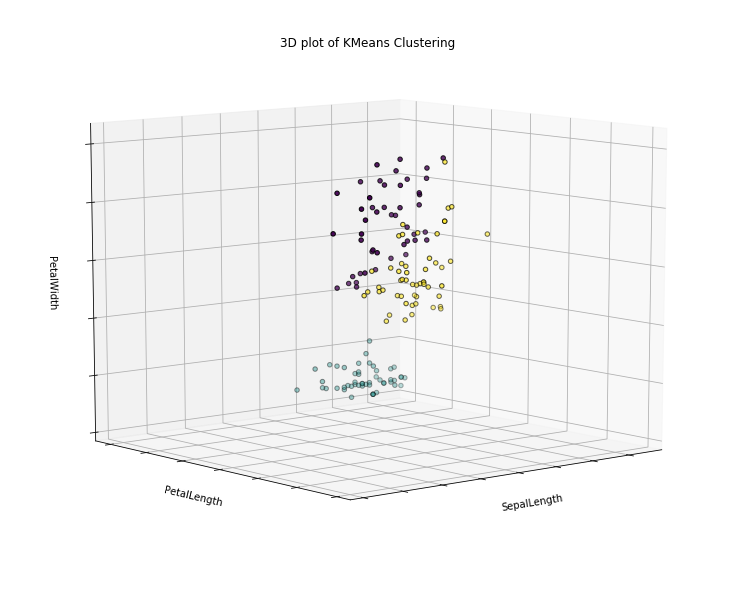

In [28]:
#3D Scatter Plot
fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig, rect = [0, 0, 1, 1], elev = 10, azim = 50)
#kmeans.fit(df_scaled)
L = kmeans.labels_
ax.scatter(iris_df2.iloc[:, 0], iris_df2.iloc[:, 2], iris_df2.iloc[:, 3],
           c = L.astype(np.float), edgecolor =  'k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SepalLength')
ax.set_ylabel('PetalLength')
ax.set_zlabel('PetalWidth')
ax.set_title('3D plot of KMeans Clustering')

In [29]:
iris_clusters = iris_df_labeled.groupby(['labels'])
df0 = iris_clusters.get_group(0)
df1 = iris_clusters.get_group(1)
df2 = iris_clusters.get_group(2)


In [30]:
df0.shape, df1.shape, df2.shape

((47, 5), (50, 5), (53, 5))

In [31]:
df0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
50,1.401508,0.337848,0.535296,0.264699,0
51,0.674501,0.337848,0.421564,0.396172,0
52,1.280340,0.106445,0.649027,0.396172,0
56,0.553333,0.569251,0.535296,0.527645,0
65,1.038005,0.106445,0.364699,0.264699,0


In [32]:
c0 = kmeans.cluster_centers_[0,:]
c1 = kmeans.cluster_centers_[1,:]
c2 = kmeans.cluster_centers_[2,:]

In [33]:
I0 = 0
I1 = 0
I2 = 0
for i in np.arange(df0.shape[0]):
  I0 = I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1 = I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2 = I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [34]:
tot_I = I0+I1+I2
print(tot_I)

140.96581663074699


In [35]:
kmeans.inertia_

140.96581663074699

In [36]:
#Linkage based euclidean distance updation calculation

from scipy.spatial.distance import cdist

D = np.array([[4,11.6], [8.2,7.9], [3.4,4.1], [7.8,20.2], [3.9,8.2], [9.2,8.1], [4.1,2.1]])
dist = cdist(D,D)
print(dist)

[[ 0.          5.59732079  7.52396172  9.40212742  3.40147027  6.26817358
   9.5005263 ]
 [ 5.59732079  0.          6.12209115 12.30650235  4.31045241  1.0198039
   7.10281634]
 [ 7.52396172  6.12209115  0.         16.69041641  4.13037529  7.04556598
   2.11896201]
 [ 9.40212742 12.30650235 16.69041641  0.         12.61784451 12.18072247
  18.47430648]
 [ 3.40147027  4.31045241  4.13037529 12.61784451  0.          5.30094331
   6.10327781]
 [ 6.26817358  1.0198039   7.04556598 12.18072247  5.30094331  0.
   7.87464285]
 [ 9.5005263   7.10281634  2.11896201 18.47430648  6.10327781  7.87464285
   0.        ]]


### Agglomerative Clustering

In [37]:
from sklearn.cluster import AgglomerativeClustering 

In [38]:
model2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',  linkage = 'ward')

In [39]:
model2.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [40]:
L = pd.DataFrame(model2.labels_)
L[0].value_counts()

0    71
1    49
2    30
Name: 0, dtype: int64

Text(0.5, 0.92, '3D plot of Agglomerative Clustering')

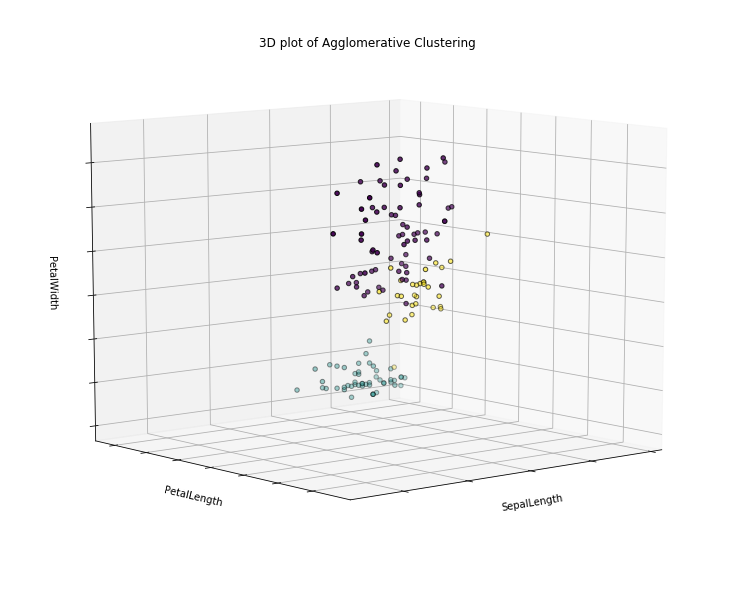

In [41]:
#Results of AGC
#3D Scatter Plot
fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig, rect = [0, 0, 1, 1], elev = 10, azim = 50)
#kmeans.fit(df_scaled)
L = model2.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 2], df_scaled.iloc[:, 3],
           c = L.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SepalLength')
ax.set_ylabel('PetalLength')
ax.set_zlabel('PetalWidth')
ax.set_title('3D plot of Agglomerative Clustering')

In [42]:
## creating a new dataframe only for labels and converting it into categorical variable
AGC_labels = pd.DataFrame(model2.labels_ , columns = list(['labels']))

AGC_labels['labels'] = AGC_labels['labels'].astype('category')

In [43]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_AGC_labeled = df_scaled.join(AGC_labels)

In [44]:
AGC_clusters = iris_AGC_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
Df0 = AGC_clusters.get_group(0)
Df1 = AGC_clusters.get_group(1)
Df2 = AGC_clusters.get_group(2)

In [45]:
(Df0.shape, Df1.shape, Df2.shape)

((71, 5), (49, 5), (30, 5))

In [46]:
C0 = np.array([Df0['SepalLengthCm'].mean(),Df0['SepalWidthCm'].mean(),Df0['PetalLengthCm'].mean(),Df0['PetalWidthCm'].mean()])
C1 = np.array([Df1['SepalLengthCm'].mean(),Df1['SepalWidthCm'].mean(),Df1['PetalLengthCm'].mean(),Df1['PetalWidthCm'].mean()])
C2 = np.array([Df2['SepalLengthCm'].mean(),Df2['SepalWidthCm'].mean(),Df2['PetalLengthCm'].mean(),Df2['PetalWidthCm'].mean()])

In [47]:
C0

array([ 0.85198648, -0.14125358,  0.85806877,  0.86280834])

In [48]:
C1

array([-1.00206653,  0.89510445, -1.30297509, -1.25663117])

In [49]:
C2

array([-0.37965933, -1.12770378,  0.09742991,  0.01051784])

In [50]:
AGC_I0 = 0
AGC_I1 = 0
AGC_I2 = 0
for i in np.arange(Df0.shape[0]):
  AGC_I0 = AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1 = AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2 = AGC_I2+np.sum((Df2.iloc[i,:-1]-C2)**2)

In [51]:
AGC_I0, AGC_I1, AGC_I2

(82.66545030423667, 41.25393855123929, 26.20293661721983)

In [52]:
AGC_I0+AGC_I1+AGC_I2

150.1223254726958

In [53]:
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [54]:
from scipy.spatial.distance import pdist

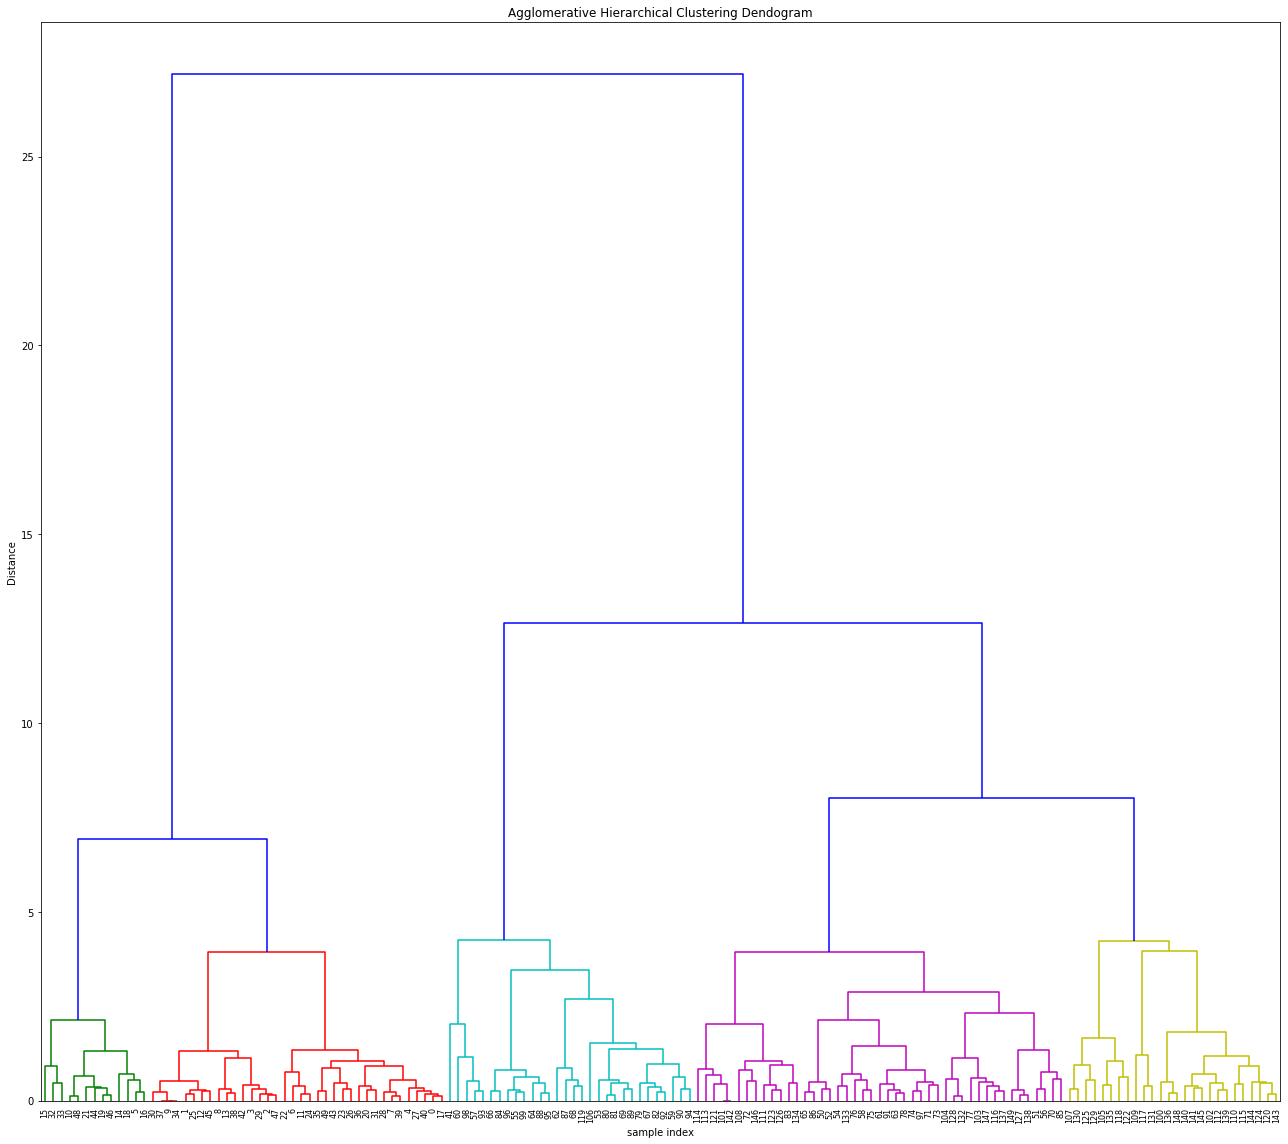

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,color_threshold=5,
           leaf_font_size=8)
plt.tight_layout()